In [23]:
## Import required packages
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

## Helper functions for plotting

For reusing the code, class is created with all necessary functions to plot the experiment results.
new object can inititated for each experiment and all ncessary helper functions can be called to 
show required plots

In [5]:
class PlotData:
    def __init__(self,directory):
        self.directory = directory
        
        data = []
        for fileName in os.listdir(directory):
            if '.pkl' not in fileName: continue
            with open(directory+fileName, "rb") as file:
                loaded_dict = pickle.load(file)   
            data.append(loaded_dict)

        df = pd.DataFrame(data)
        params = pd.DataFrame(df['params'].to_list(),columns=['Param 1','Param 2','Param 3','Param 4'])
        grads = pd.DataFrame(df['grads'].to_list(),columns=['Grad 1','Grad 2','Grad 3','Grad 4'])
        self.df = pd.concat([df,params,grads],axis=1)
        self.df.drop(columns=['params','grads'],inplace=True)
        
    def plotRewardPerEpoch(self):
        sns.lineplot(x='epoch',y='reward',data=self.df)
        plt.title("Reward vs Epoch")
        plt.show()
    
    def plotParamsPerEpoch(self):
        sns.lineplot(x='epoch',y='Param 1',data=self.df)
        plt.title("ky vs Epoch")
        plt.ylabel("ky")
        plt.show()

        sns.lineplot(x='epoch',y='Param 2',data=self.df)
        plt.title("kx vs Epoch")
        plt.ylabel("kx")
        plt.show()

        sns.lineplot(x='epoch',y='Param 3',data=self.df)
        plt.title("abs_pitch_delta vs Epoch")
        plt.ylabel("abs_pitch_delta")
        plt.show()

        sns.lineplot(x='epoch',y='Param 4',data=self.df)
        plt.title("abs_thrust_delta vs Epoch")
        plt.ylabel("abs_thrust_delta")
        plt.show()    
        
    def plotParamsPerReward(self):
        sns.lineplot(x='Param 1', y='reward' ,data=self.df)
        plt.title("ky vs Reward")
        plt.ylabel("Reward")
        plt.show()

        sns.lineplot(x='Param 2',y='reward' ,data=self.df)
        plt.title("kx vs Reward")
        plt.ylabel("Reward")
        plt.show()

        sns.lineplot(x ='Param 3',y='reward' ,data=self.df)
        plt.title("abs_pitch_delta vs Reward")
        plt.ylabel("Reward")
        plt.show()

        sns.lineplot(x = 'Param 4',y='reward' ,data=self.df)
        plt.title("abs_thrust_delta vs Reward")
        plt.ylabel("Reward")
        plt.show()  
        
 
    
    

# Experiment 1


**Reward function:**<br>
- For reaching target +2
- Based on euclidien distance if drone moves closer to the target from the last step receives +1
- Other cases -1

**Optimizer:**
<p>Simple gradient ascent</p>

In [3]:
exp1 = PlotData('weights/run_2023-01-05_15-04-25/')

### Plotting Reward vs Epoch

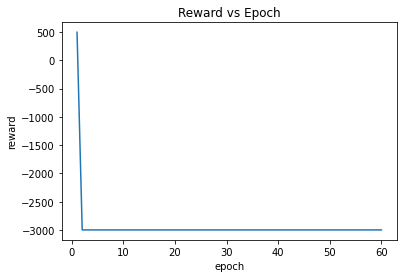

In [4]:
exp1.plotRewardPerEpoch()

### Plotting changes in the parameters per epoch

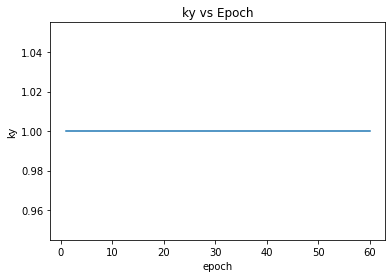

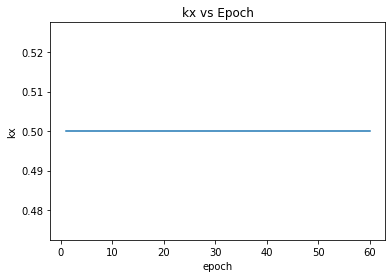

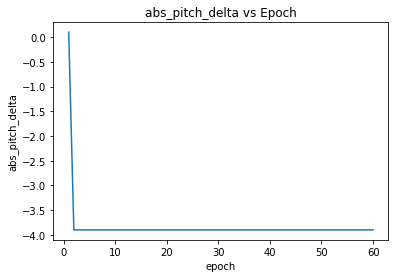

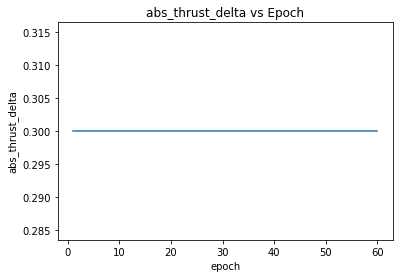

In [5]:
exp1.plotParamsPerEpoch()

### Plotting chnages in the Reward per chnage parameters

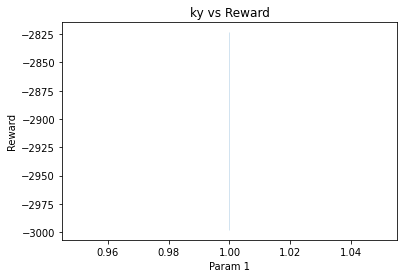

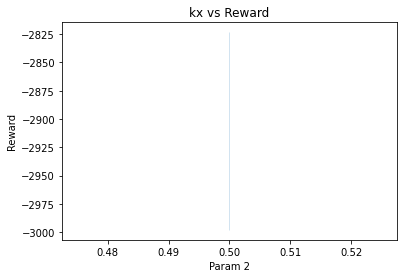

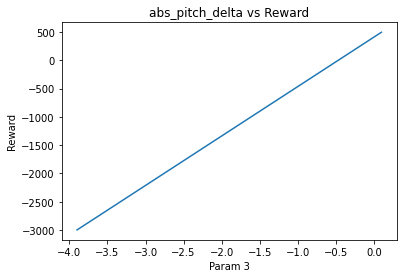

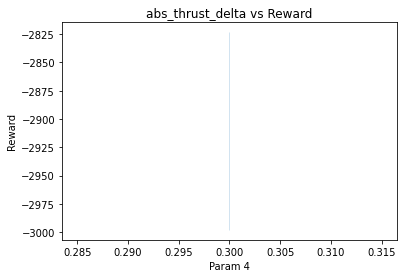

In [6]:
exp1.plotParamsPerReward()

# Experiment 2


**Reward function:**<br>
- For reaching target +2
- Based on euclidien distance if drone moves closer to the target from the last step receives +1
- Other cases -1

**Optimizer:**
<p>Adam optimizer with gradient ascent</p>

In [7]:
exp2 = PlotData('weights/run_2023-01-05_18-36-08/')

### Plotting Reward vs Epoch

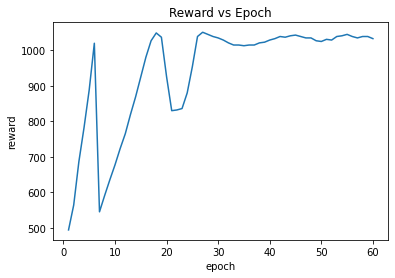

In [8]:
exp2.plotRewardPerEpoch()

### Plotting changes in the parameters per epoch

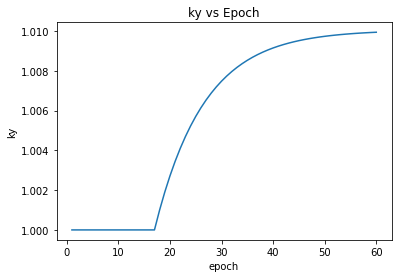

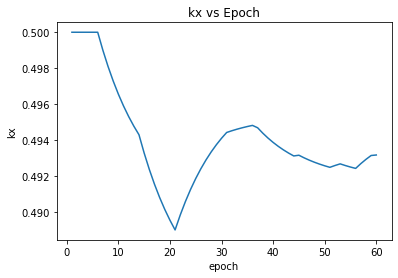

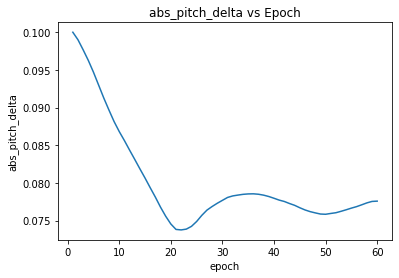

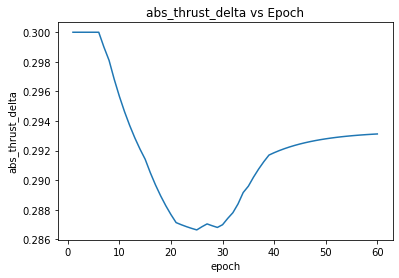

In [9]:
exp2.plotParamsPerEpoch()

### Plotting chnages in the Reward per chnage parameters

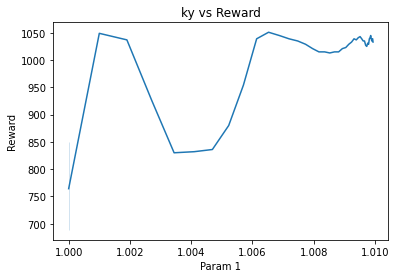

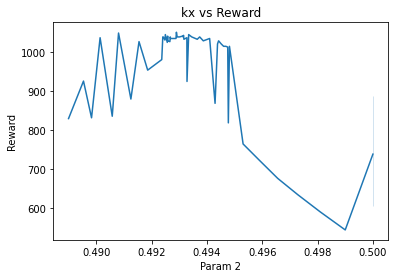

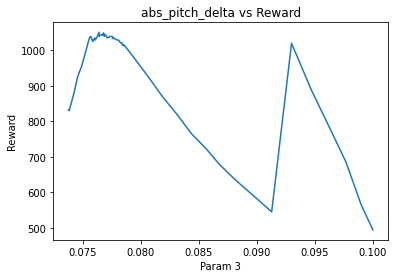

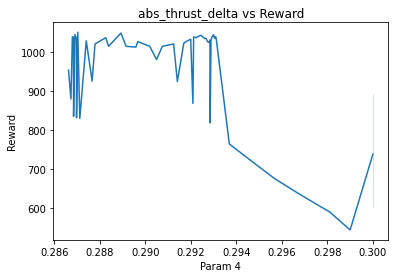

In [10]:
exp2.plotParamsPerReward()

# Experiment 3


**Reward function:**<br>
- 100 for reaching the target and -distance for every other step

**Optimizer:**
<p>Adam optimizer with gradient ascent</p>

**Epochs:**
<p>60</p>

In [11]:
exp3 = PlotData('weights/run_2023-01-05_22-28-40/')

### Plotting Reward vs Epoch

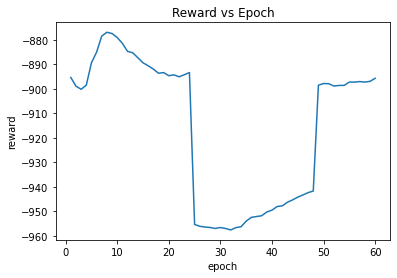

In [12]:
exp3.plotRewardPerEpoch()

### Plotting changes in the parameters per epoch

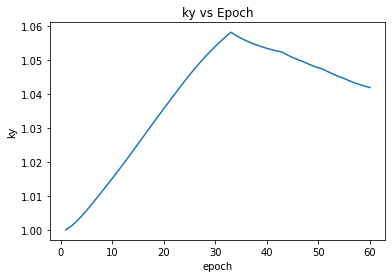

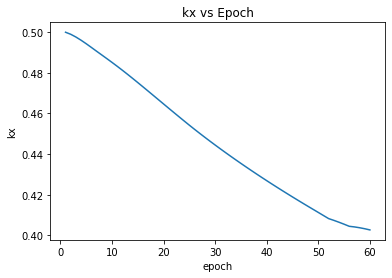

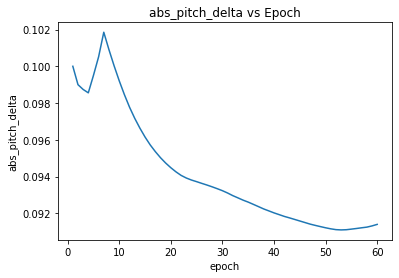

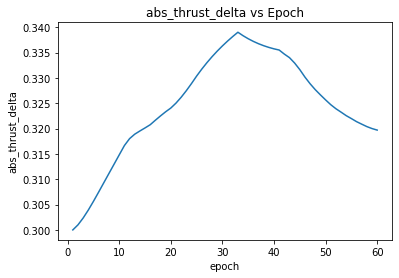

In [13]:
exp3.plotParamsPerEpoch()

### Plotting chnages in the Reward per chnage parameters

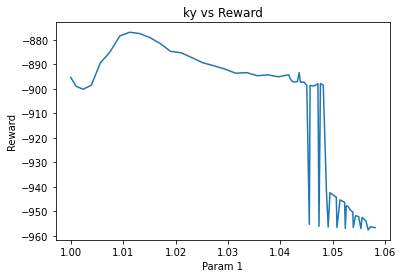

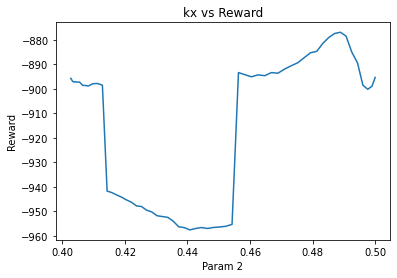

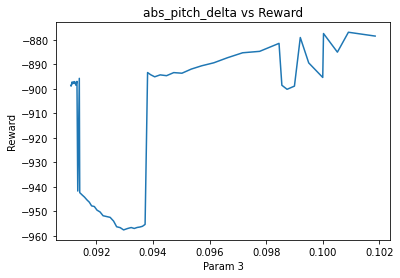

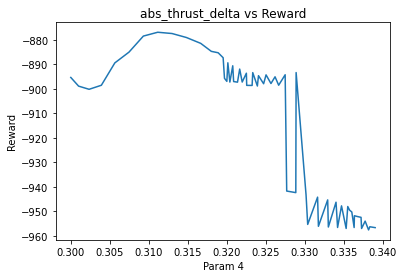

In [14]:
exp3.plotParamsPerReward()

# Experiment 4


**Reward function:**<br>
- 500 for reaching the target and -1 for every other step. Finally - distance left to the last target point

**Optimizer:**
<p>Adam optimizer with gradient ascent</p>

**Epochs:**
<p>120</p>

In [22]:
exp4 = PlotData('weights/run_2023-01-06_11-12-09/')

### Plotting Reward vs Epoch

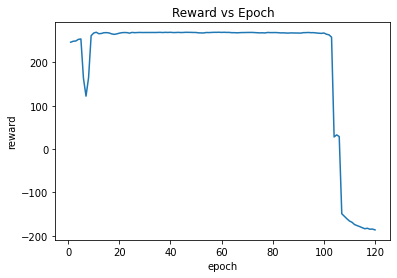

In [23]:
exp4.plotRewardPerEpoch()

### Plotting changes in the parameters per epoch

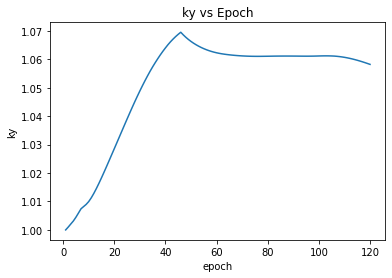

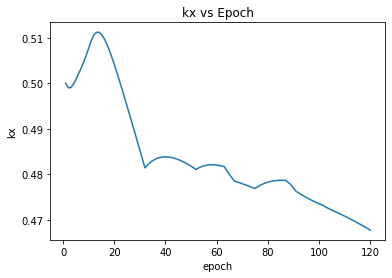

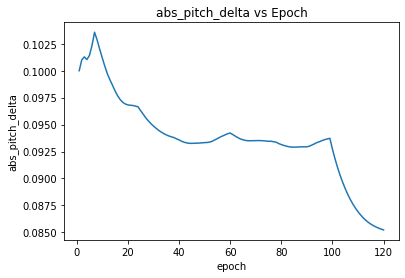

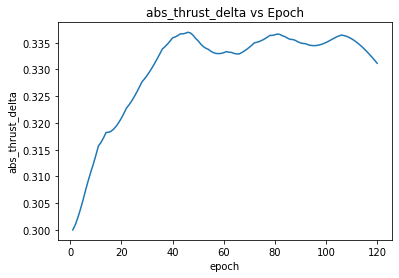

In [24]:
exp4.plotParamsPerEpoch()

### Plotting chnages in the Reward per chnage parameters

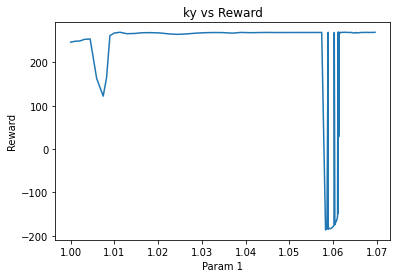

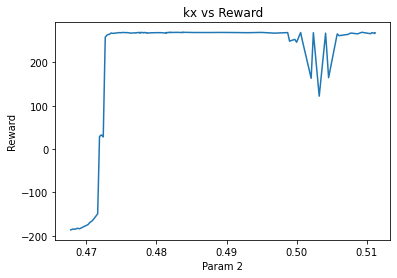

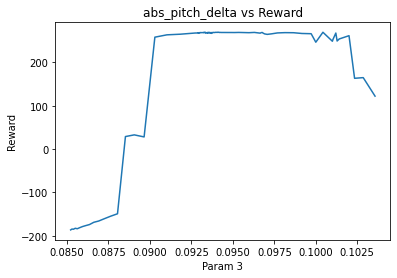

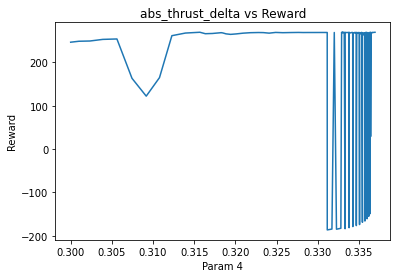

In [25]:
exp4.plotParamsPerReward()

# Experiment 5


**Reward function:**<br>
- 1000 for reaching the target and -1 for every other step. Finally - distance left to the last target point

**Optimizer:**
<p>Adam optimizer with gradient ascent</p>

**Epochs:**
<p>180</p>

In [6]:
exp5 = PlotData('weights/run_2023-01-06_12-26-56/')

### Plotting Reward vs Epoch

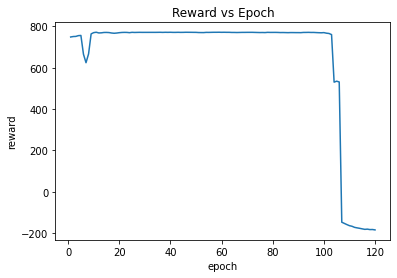

In [7]:
exp5.plotRewardPerEpoch()

### Plotting changes in the parameters per epoch

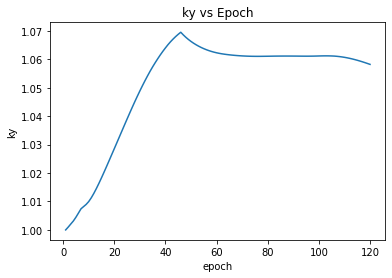

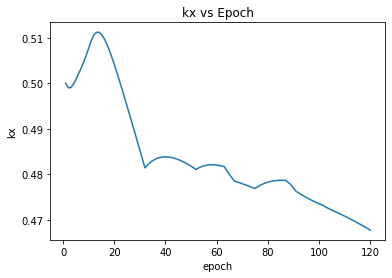

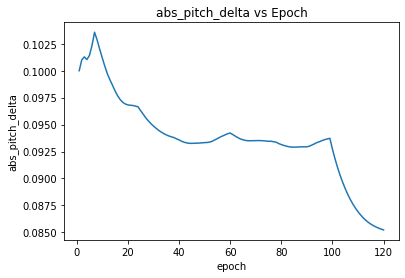

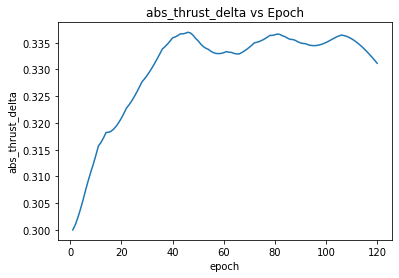

In [28]:
exp5.plotParamsPerEpoch()

### Plotting chnages in the Reward per chnage parameters

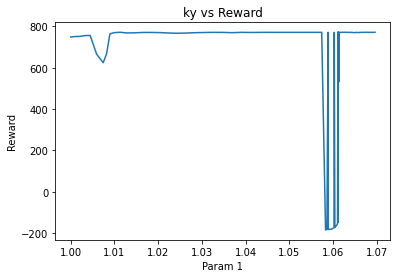

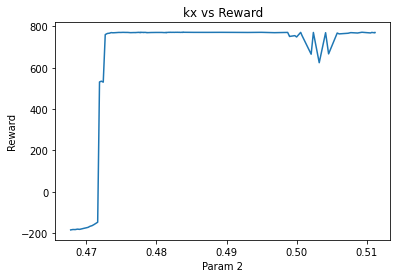

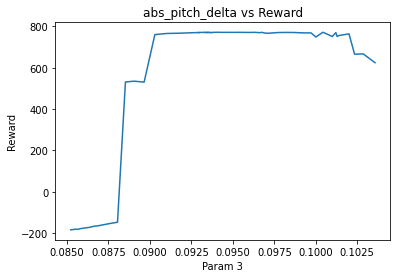

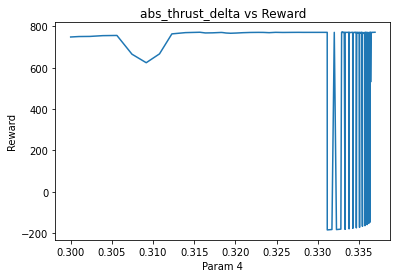

In [8]:
exp5.plotParamsPerReward()

### Parameters at best reward

In [9]:
exp5.df[exp5.df["reward"]==exp5.df["reward"].max()]

,epoch,reward,hits,dist_left,Param 1,Param 2,Param 3,Param 4,Grad 1,Grad 2,Grad 3,Grad 4
75,59,771.596817,4,232.403183,1.062539,0.482056,0.094149,0.333005,35.968759,-181.656414,-4258.338649,1070.454817


### Intial Parameters

In [34]:
exp5.df.sort_values(by="epoch").head(1)

,epoch,reward,hits,dist_left,Param 1,Param 2,Param 3,Param 4,Grad 1,Grad 2,Grad 3,Grad 4
0,1,748.611909,4,255.388091,1.0,0.5,0.1,0.3,21.031827,-50.597908,5879.691818,1331.829706


### Saving parameters

> Saving bets parameters which observed above

In [24]:
parameter_array = np.array(exp5.df[exp5.df["reward"]==exp5.df["reward"].max()].to_dict('split')['data'][0][4:8])
np.save('heuristic_controller_parameters.npy', parameter_array)